### Simulation model

Take true model

$$y_i=\beta x_i$$

$\vec{X} is a sample of observed variables and \vec{Y} is a response variable to that sample.

We want to compare two models:

$$y_i=\beta_0 + \beta_1 x_i + \epsilon_i$$

and

$$y_i=\beta x_i + \epsilon_i$$

We assume that $$y_i \sim \mathcal{N}(\beta_0+\beta_1 x_i, \sigma ^2)$$


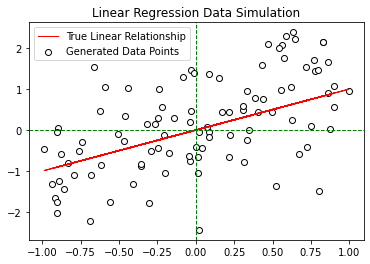

In [1]:
import numpy as np
import matplotlib.pyplot as plt


num_samples = 100  # number of sample points

#X = np.linspace(0, 1, num_samples) * 2 - 1
X = np.random.rand(num_samples) * 2 - 1

beta =  1 # true slope
beta_0 = 0.1
noise = np.random.randn(num_samples)  # standard normal noise term

y = beta * X + noise + beta_0


plt.plot(X, beta * X, color='red', linewidth=1, label='True Linear Relationship')
plt.scatter(X, y, color='white', edgecolor='black', marker='o', label='Generated Data Points')
plt.legend()

plt.axhline(0, color='green', linewidth=1, linestyle='--')
plt.axvline(0, color='green', linewidth=1, linestyle='--')

plt.title('Linear Regression Data Simulation')
plt.show()

We will compare two regression models:

One is with intercept term and the other one is a no-intercept

$$
\hat{\beta_1} = \frac{S_{xy}}{S_{xx}}
$$

$$
S_{xy} = \sum (x_i- \bar{x})y_i
$$

$$
S_{xx} = \sum (x_i- \bar{x})^2
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x} 
$$

$$
\hat{\beta} = \frac{\sum x_i y_i}{\sum x_i^2}
$$

In [2]:
mean_x = np.average(X)
mean_y = np.average(y)

Sxx = np.sum((X-mean_x)**2)
Sxy = np.sum((X-mean_x)*y)


beta_1_hat = Sxy/Sxx
beta_0_hat = mean_y - beta_1_hat * mean_x

beta_hat = np.sum(X*y)/np.sum(X**2) 

print(beta_hat)
print(beta_1_hat)
print(beta_0_hat)

1.168655559545395
1.1602324282480052
0.12460381977476634


Let's plot regression lines:


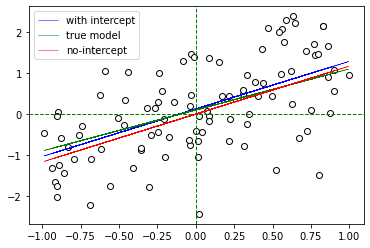

In [3]:
plt.scatter(X, y, color='white', edgecolor='black', marker='o')

plt.axhline(0, color='green', linewidth=1, linestyle='--')
plt.axvline(0, color='green', linewidth=1, linestyle='--')


plt.plot(X, beta_1_hat * X + beta_0_hat, color='blue', linewidth=0.5, label='with intercept')
plt.plot(X, beta * X + beta_0, color='green', linewidth=0.5, label='true model')
plt.plot(X, beta_hat * X, color='red', linewidth=0.5, label='no-intercept')

plt.legend()

Zoom a little bit...

(-0.5, 0.5)

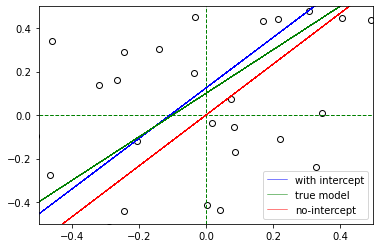

In [4]:
plt.scatter(X, y, color='white', edgecolor='black', marker='o')

plt.axhline(0, color='green', linewidth=1, linestyle='--')
plt.axvline(0, color='green', linewidth=1, linestyle='--')

plt.plot(X, beta_1_hat * X + beta_0_hat, color='blue', linewidth=0.5, label='with intercept')
plt.plot(X, beta * X + beta_0, color='green', linewidth=0.5, label='true model')
plt.plot(X, beta_hat * X, color='red', linewidth=0.5, label='no-intercept')

plt.legend()

plt.xlim(-0.5, 0.5) 
plt.ylim(-0.5, 0.5)  


Let's compare sum of squares of differences between fitted response values and true response values of two models and call the value $SS_{dev}$, or sum of square deviations (from true model), or $SSD$.
($SS_{dev} = \sum (y_i-\hat{y_i})^2$)

In [5]:
y_hat = beta_1_hat * X + beta_0_hat  # intercept model response variable
y_hat_hat = beta_hat * X  # no-intercept response variable


y = beta * X + beta_0

SS_dev_intercept = np.sum((y-y_hat)**2)
SS_dev_no_intercept = np.sum((y-y_hat_hat)**2)

print(f"SSD of intercept model: {SS_dev_intercept}")
print(f"SSD of no-intercept model: {SS_dev_no_intercept}")

SSD of intercept model: 0.8914890891561243
SSD of no-intercept model: 1.829593107210288


### Same calculations but many times

In [6]:
SS_dev_intercept_mean = 0
SS_dev_no_intercept_mean = 0


for i in range(1000):
    num_samples = 100 

    X = np.random.rand(num_samples) * 2 - 1

    beta =  1 # true slope
    beta_0 = 0.05
    noise = np.random.randn(num_samples)  # standard normal noise term

    y = beta * X + noise + beta_0

    mean_x = np.average(X)
    mean_y = np.average(y)

    Sxx = np.sum((X-mean_x)**2)
    Sxy = np.sum((X-mean_x)*y)


    beta_1_hat = Sxy/Sxx
    beta_0_hat = mean_y - beta_1_hat * mean_x

    beta_hat = np.sum(X*y)/np.sum(X**2)


    y_hat = beta_1_hat * X + beta_0_hat  # intercept model response variable
    y_hat_hat = beta_hat * X  # no-intercept response variable


    y = beta * X + beta_0

    SS_dev_intercept = np.sum((y-y_hat)**2)
    SS_dev_no_intercept = np.sum((y-y_hat_hat)**2)
    
    SS_dev_intercept_mean += SS_dev_intercept
    SS_dev_no_intercept_mean += SS_dev_no_intercept
    
print(SS_dev_intercept_mean/1000)
print(SS_dev_no_intercept_mean/1000)

1.948350928574325
1.183495807012832
